In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from  collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics,svm

In [2]:
data = pd.read_csv('SPAM text message 20170820 - Data.csv', encoding = 'latin-1')
data.head(n = 10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


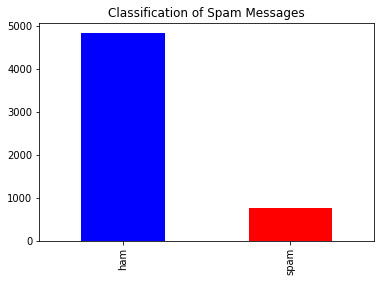

In [3]:
count_Class = pd.value_counts(data["Category"], sort = True)
count_Class.plot(kind = "bar", color = ["blue", "red"])
plt.title("Classification of Spam Messages")
plt.show()

In [4]:
count1 = Counter(" ".join(data[data["Category"]=="ham"]["Message"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0:"words in non-spam", 1:"count"})

count2 = Counter(" ".join(data[data["Category"]=="spam"]["Message"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns = {0:"words in spam", 1:"count_"})

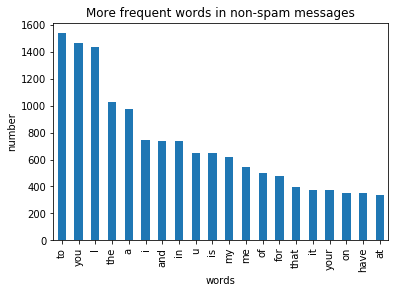

In [5]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

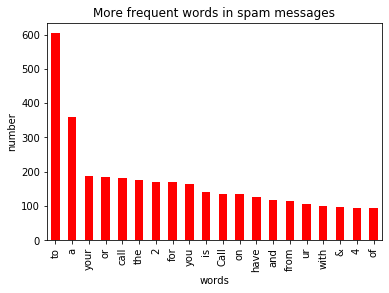

In [6]:
df2.plot.bar(legend = False, color = 'red')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [7]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(data["Message"])
np.shape(X)

(5572, 8476)

In [8]:
data["Category"] = data["Category"].map({"spam":1, "ham":0})
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, data["Category"], test_size = 0.33, random_state = 42)
print([np.shape(X_train), np.shape(X_test)])

[(3733, 8476), (1839, 8476)]


In [9]:
list_alpha = np.arange(1/100, 20, 0.11)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train, Y_train)
    score_train[count] = bayes.score(X_train, Y_train)
    score_test[count]= bayes.score(X_test, Y_test)
    recall_test[count] = metrics.recall_score(Y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(Y_test, bayes.predict(X_test))
    count = count + 1 

In [10]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = ['alpha', 'Train Accuracy','Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=182)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.01,0.997053,0.978249,0.959350,0.887218
1,0.12,0.997053,0.976074,0.963415,0.871324
2,0.23,0.996518,0.976074,0.963415,0.871324
3,0.34,0.996785,0.977705,0.967480,0.878229
4,0.45,0.996250,0.977705,0.967480,0.878229
...,...,...,...,...,...
177,19.48,0.970533,0.970092,0.776423,1.000000
178,19.59,0.970533,0.970092,0.776423,1.000000
179,19.70,0.970265,0.970092,0.776423,1.000000
180,19.81,0.969997,0.970092,0.776423,1.000000


In [11]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

alpha             15.410000
Train Accuracy     0.974819
Test Accuracy      0.977705
Test Recall        0.833333
Test Precision     1.000000
Name: 140, dtype: float64

In [12]:
models[models['Test Precision']==1].head(n=10)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
140,15.41,0.974819,0.977705,0.833333,1.0
141,15.52,0.974551,0.976618,0.825203,1.0
142,15.63,0.974551,0.976618,0.825203,1.0
143,15.74,0.974551,0.976618,0.825203,1.0
144,15.85,0.974551,0.976618,0.825203,1.0
145,15.96,0.974283,0.976618,0.825203,1.0
146,16.07,0.974283,0.976074,0.821138,1.0
147,16.18,0.974016,0.975530,0.817073,1.0
148,16.29,0.974016,0.975530,0.817073,1.0
149,16.40,0.974016,0.975530,0.817073,1.0


In [13]:
best_index = models[models['Test Precision']==1]['Test Accuracy'].idxmax()
bayes = naive_bayes.MultinomialNB(alpha=list_alpha[best_index])
bayes.fit(X_train, Y_train)
models.iloc[best_index, :]

alpha             15.410000
Train Accuracy     0.974819
Test Accuracy      0.977705
Test Recall        0.833333
Test Precision     1.000000
Name: 140, dtype: float64

In [20]:
# Now Using SVM's
list_C = np.arange(500,2000,100)
train_score = np.zeros(len(list_C))
test_score = np.zeros(len(list_C))
recall = np.zeros(len(list_C))
precision = np.zeros(len(list_C))
count = 0
for C in list_C:
    model = svm.SVC(C=C)
    model.fit(X_train, Y_train)
    train_score[count] = model.score(X_train, Y_train)
    test_score[count] = model.score(X_test, Y_test)
    recall[count] = metrics.recall_score(Y_test, model.predict(X_test))
    precision[count] = metrics.precision_score(Y_test, model.predict(X_test))
    count += 1

C:\Users\HARSHA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\HARSHA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\HARSHA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\HARSHA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureW

In [21]:
matrix = np.matrix(np.c_[list_C, train_score, test_score, recall, precision])
models = pd.DataFrame(data = matrix, columns = ['C', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,500.0,0.993035,0.985318,0.890244,1.0
1,600.0,0.994374,0.986949,0.902439,1.0
2,700.0,0.995982,0.986949,0.902439,1.0
3,800.0,0.997589,0.986949,0.902439,1.0
4,900.0,0.997857,0.986949,0.902439,1.0
5,1000.0,0.998125,0.987493,0.906504,1.0
6,1100.0,0.998393,0.987493,0.906504,1.0
7,1200.0,0.999196,0.987493,0.906504,1.0
8,1300.0,0.999196,0.987493,0.906504,1.0
9,1400.0,0.999196,0.987493,0.906504,1.0


In [22]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

C                 500.000000
Train Accuracy      0.993035
Test Accuracy       0.985318
Test Recall         0.890244
Test Precision      1.000000
Name: 0, dtype: float64

In [26]:
best_index = models[models['Test Precision']==1]['Test Accuracy'].idxmax()
svc = svm.SVC(C=list_C[best_index])
svc.fit(X_train, Y_train)
models.iloc[best_index, :]

C:\Users\HARSHA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


C                 1000.000000
Train Accuracy       0.998125
Test Accuracy        0.987493
Test Recall          0.906504
Test Precision       1.000000
Name: 5, dtype: float64